<a href="https://colab.research.google.com/github/Tranminhtuan48/pythonbasics/blob/main/LogisticsWithDEF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phân Lớp SVM Cho Bộ Dữ Liệu Mnsist

Bộ dữ liệu MNIST phổ biến và xây dựng mô hình SVM để phân loại các chữ số viết tay.. <a href='http://yann.lecun.com/exdb/mnist/'>Thông tin về tập  dữ liệu</a>

# Mục Tiêu
Xây dựng mô hình sử dụng Máy vectơ hỗ trợ để phân loại chính xác các chữ số viết tay từ 0-9 dựa trên các giá trị pixel được cung cấp dưới dạng Features. Như vậy, đây là bài toán 10-class classification.
# Mô Tả Dữ Liệu
Tập dữ liệu được sử dụng là dữ liệu MNIST, một cơ sở dữ liệu lớn về các chữ số viết tay. 'Giá trị pixel' của mỗi chữ số (hình ảnh) bao gồm các đặc điểm và số thực tế trong khoảng 0-9 là nhãn.

Vì mỗi hình ảnh có kích thước 28 x 28 pixel và mỗi pixel tạo thành một đối tượng nên có 784 đối tượng.
<br>

----------
# Mục Lục:
- Tìm hiểu và làm sạch dữ liệu
- Chuẩn bị dữ liệu xây dựng mô hình
- Xây dựng mô hình SVM - điều chỉnh siêu tham số, đánh giá mô hình, v.v.

#### LƯU Ý:
Vì giới hạn hệ thống và kích thước dữ liệu hiện có, để giúp việc phân tích dễ dàng hơn chúng ta sẽ dùng 50% tập dữ liệu có sẵn để xây dựng mô hình.<br>

## Data Understanding and Cleaning

 Tìm hiểu và làm sạch dữ liệu

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import gc
import cv2

In [ ]:
# Đọc dữ liệu
digits = pd.read_csv("/train.csv")
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
# head
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
four = digits.iloc[2, 1:]
four.shape

(784,)

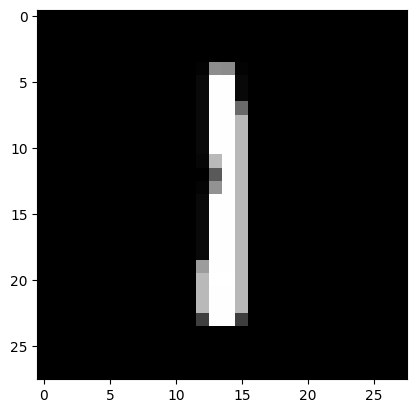

In [ ]:
four = four.values.reshape(28, 28)
plt.imshow(four, cmap='gray')

## Data Preparation cho Xây Dựng Mô Hình

Chuẩn bị tập dữ liệu để xây dựng mô hình. Lưu ý chỉ sử dụng một phần dữ liệu,
để tiết kiệm thời gian

In [ ]:
# Tạo Tập train và test
# Phân chia tập dữ liệu (Splitting data)
X = digits.iloc[:, 1:]
Y = digits.iloc[:, 0]

# Chuẩn hóa đặc trưng
from sklearn.preprocessing import scale
X = scale(X)

# train test split với train_size=10% và test size=90%
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.10, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(4200, 784)
(37800, 784)
(4200,)
(37800,)


In [ ]:
#Day chinh la ham  hw(X)
def sigmoid(X, w):
    result = 1/(1 + np.exp(-np.dot(X, w)))
    return result

In [ ]:
def loss(X, y, w):
    m = y.shape[0]
    result = (-1/m)*np.sum(np.dot(y.T, np.log(sigmoid(X, w))) + np.dot((1 - y).T, np.log(1 - sigmoid(X, w))))
    return result

In [ ]:
def gradient(X, y, w):
    m = X.shape[0]
    result = (1/m)*np.dot(X.T, sigmoid(X, w) - y)
    return result

In [ ]:
def gradientDescent(X, y, w, alpha, n_iters):
    w_optimal = w.copy()
    J_history = []
    for i in range(n_iters):
        w_optimal = w_optimal - alpha*gradient(X, y, w_optimal)
        J_history.append(loss(X, y, w_optimal))
    return w_optimal, J_history

In [ ]:
def main():
    alpha = 0.01
    n_iters = 2000
    w_opt, J_hist = gradientDescent(X_scl, y, w, alpha, n_iters)
    print("Ket qua la: ")
    print('\t\tTrong so w toi uu la: ', w_opt)
    print('\t\tGia tri Loss toi uu: ', J_hist[-1])

if __name__ == "__main__":
    main()